<a href="https://colab.research.google.com/github/rupika1306/Covid-Prediction/blob/master/Copy_of_covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Train'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/Train')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Val',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 288 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
   training_set,
   validation_data=test_set,
   epochs=10,
   steps_per_epoch=len(training_set),
   validation_steps=len(test_set)   
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
15/15 [==============================] - 144s 9s/step - loss: 2.4488 - accuracy: 0.7551 - val_loss: 0.6387 - val_accuracy: 0.9333
Epoch 2/10
15/15 [==============================] - 47s 3s/step - loss: 0.5566 - accuracy: 0.9588 - val_loss: 0.7308 - val_accuracy: 0.9667
Epoch 3/10
15/15 [==============================] - 47s 3s/step - loss: 0.4506 - accuracy: 0.9744 - val_loss: 0.0909 - val_accuracy: 0.9833
Epoch 4/10
15/15 [==============================] - 47s 3s/step - loss: 0.8543 - accuracy: 0.9475 - val_loss: 0.0300 - val_accuracy: 0.9833
Epoch 5/10
15/15 [==============================] - 47s 3s/step - loss: 0.0447 - accuracy: 0.9976 - val_loss: 3.1943 - val_accuracy: 0.9000
Epoch 6/10
15/15 [==============================] - 47s 3s/step - loss: 0.6865 - accuracy: 0.9473 - val_loss: 0.5574 - val_accuracy: 0.9667
Epoch 7/10
15/15 [==============================] - 47s 3s/step - loss: 0.2225 - accuracy: 0.9836 - val_loss: 0.1192 - val_accuracy: 0.9833
Epoch 8/10
15/15 [=

In [ ]:
import matplotlib.pyplot as plt

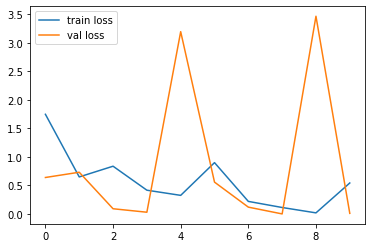

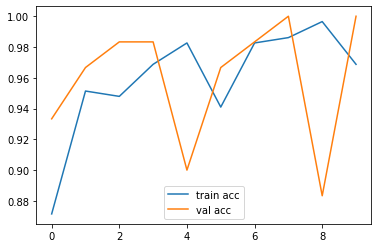

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[6.5415292e-36, 1.0000000e+00],
       [1.0000000e+00, 9.0197167e-31],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [4.4261144e-38, 1.0000000e+00],
       [4.5371833e-01, 5.4628170e-01],
       [1.0000000e+00, 1.4143779e-33],
       [1.0000000e+00, 2.3742720e-34],
       [1.0000000e+00, 9.0198537e-16],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.9743219e-29, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.5478524e-35, 1.0000000e+00],
       [1.0000000e+00, 1.4457130e-23],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 7.

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg',target_size=[224,224])

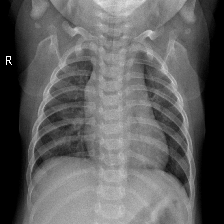

In [ ]:
img

In [ ]:
from PIL import Image

In [ ]:
pred=image.img_to_array(img)

In [ ]:
pred=np.expand_dims(pred,axis=0)

In [ ]:
result=model.predict(pred)

In [ ]:
print(result)

[[1. 0.]]
